In [123]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sb

In [151]:
iris = datasets.load_iris()
X=iris.data[:, 0:2]
y=iris.target

In [152]:
X.shape, y.shape

((150, 2), (150,))

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,KFold

In [154]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = KNeighborsClassifier(n_neighbors=5) 

In [155]:
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8,oob_score=True, random_state=0)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8,oob_score=True, random_state=0)

In [169]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score1 = cross_val_score(clf1, X, y, cv=kf, scoring='accuracy')
score2 = cross_val_score(bagging1, X, y, cv=kf, scoring='accuracy')
score3 = cross_val_score(bagging2, X, y, cv=kf, scoring='accuracy')

In [170]:
np.mean(score1), np.std(score1)

(0.6733333333333333, 0.07118052168020875)

In [171]:
np.mean(score2), np.std(score2)

(0.7266666666666668, 0.05734883511361754)

In [172]:
np.mean(score3), np.std(score3)

(0.72, 0.08326663997864533)

In [163]:
from mlxtend.plotting import plot_decision_regions

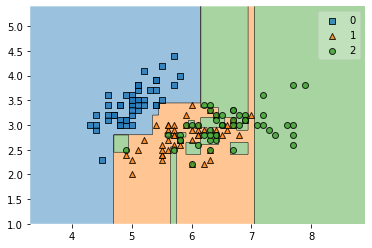

In [161]:
clf1.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf1)

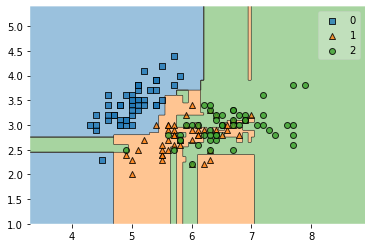

In [162]:
bagging1.fit(X,y)
plot_decision_regions(X=X, y=y, clf=bagging1)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [192]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [193]:
bagging1.fit(xtrain,ytrain)
ypred=bagging1.predict(xtest)

In [194]:
bagging1.oob_score_

0.8095238095238095

In [195]:
cm=confusion_matrix(ytest,ypred)

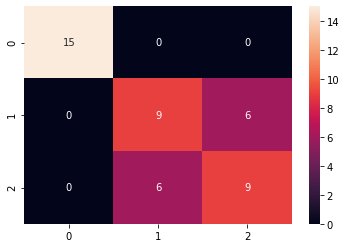

In [179]:
sb.heatmap(cm,annot=True)

In [197]:
yprob=bagging1.predict_proba(xtest)
yprob[:5]

array([[0.        , 0.36666667, 0.63333333],
       [0.        , 0.675     , 0.325     ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.1       , 0.9       ]])

<Figure size 432x288 with 0 Axes>

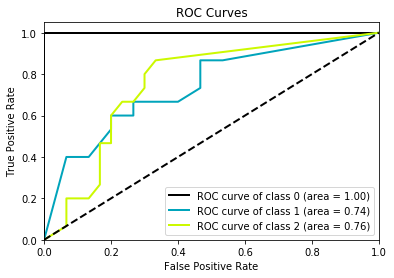

<Figure size 432x288 with 0 Axes>

In [199]:
#!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_roc(ytest,yprob,plot_micro=False,plot_macro=False)
plt.figure()